### Scatter plot of METTL3-KO sample

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 103 rows containing missing values.


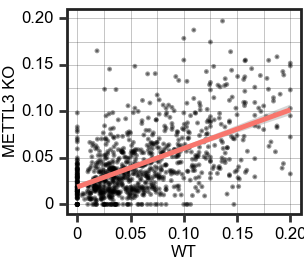

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 1.52 x 1.33 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/supplemental_figure_6a_METTL3-KO_scatter.pdf
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 103 rows containing missing values.


In [3]:
#site level

import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import numpy as np

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"



WT="/home/wuyou/Projects/human_HEK293T_nanopore/data/results/RRACH_WT.predict"
KO="/home/wuyou/Projects/human_HEK293T_nanopore/data/results/RRACH_KO.predict"

probalibility_cutoff=0.95

WT_count_dict={}
with open(WT) as f:
    for line in f:
        site="|".join(line.split("\t")[0:2])
        mod_probability=float(line.split("\t")[5])
        if site not in WT_count_dict:
            WT_count_dict[site]=[0,0]
        if mod_probability>probalibility_cutoff:
            WT_count_dict[site][0]+=1
        WT_count_dict[site][1]+=1

           
KO_count_dict={}
with open(KO) as f:
    for line in f:
        site="|".join(line.split("\t")[0:2])
        mod_probability=float(line.split("\t")[5])
        if site not in KO_count_dict:
            KO_count_dict[site]=[0,0]
        if mod_probability>probalibility_cutoff:
            KO_count_dict[site][0]+=1
        KO_count_dict[site][1]+=1   



  
WT=[]
KO=[]

for gene_id in WT_count_dict:
    if gene_id in KO_count_dict:
        if WT_count_dict[gene_id][1]>50 and KO_count_dict[gene_id][1]>50:
            WT.append(WT_count_dict[gene_id][0]/WT_count_dict[gene_id][1])
            KO.append(KO_count_dict[gene_id][0]/KO_count_dict[gene_id][1])

data=pd.DataFrame({"WT":WT,"METTL3 KO":KO})

p=(
    ggplot(data,aes(x="WT",y="METTL3 KO"))
    +geom_point(data,aes(x="WT",y="METTL3 KO"),size=0.001,alpha=0.4)   
    +geom_smooth(method="lm",color="#F8766D")
    #+scale_x_continuous(breaks = [0,100,200,300],labels =["               5'UTR", "                CDS", "                3'UTR",""])
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            strip_text_x = element_text(size = 6),            #facet font size
            legend_position = "none",
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
           
            figure_size=[1.52,1.33],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            #legend_position=(0.45,0.4), 
            legend_key_size=12) #change legend text font size)
    #+ geom_vline(xintercept=100,linetype="dashed",alpha=0.5)
    #+ geom_vline(xintercept=200,linetype="dashed",alpha=0.5)
    +ylim([0,0.20])
    +xlim([0,0.20])
    +scale_fill_manual(values=[c1, c2, c3]) 
    #+stat_smooth(method='lm',color="black")

)

print(p)
p.save('figure/supplemental_figure_6a_METTL3-KO_scatter.pdf')

### Scatter plot of NSUN2-KO sample

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 151 rows containing missing values.


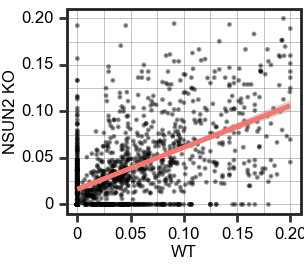

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 1.52 x 1.33 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/supplemental_figure_6b_NSUN2-KO_scatter.pdf


/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 151 rows containing missing values.


In [8]:
WT="/home/wuyou/Projects/paper/CHEUI/predict/median_mad/WT_C.predict.txt"
KO="/home/wuyou/Projects/paper/CHEUI/predict/median_mad/KO_C.predict.txt"

probalibility_cutoff=0.99

WT_count_dict={}
with open(WT) as f:
    for line in f:
        site="|".join(line.split("\t")[0:2])
        motif=line.split("\t")[2]
        mod_probability=float(line.split("\t")[5])
        if site not in WT_count_dict:
            WT_count_dict[site]=[0,0,0]
        if mod_probability>probalibility_cutoff:
            WT_count_dict[site][0]+=1
        WT_count_dict[site][1]+=1
        WT_count_dict[site][2]=motif

            
KO_count_dict={}
with open(KO) as f:
    for line in f:
        site="|".join(line.split("\t")[0:2])
        motif=line.split("\t")[2]
        mod_probability=float(line.split("\t")[5])
        if site not in KO_count_dict:
            KO_count_dict[site]=[0,0,0]
        if mod_probability>probalibility_cutoff:
            KO_count_dict[site][0]+=1
        KO_count_dict[site][1]+=1
        KO_count_dict[site][2]=motif

        

count=0
for site in WT_count_dict:
    #print(site)
    if site in KO_count_dict:
        if WT_count_dict[site][1]>20 and WT_count_dict[site][1]>20 and WT_count_dict[site][0]/WT_count_dict[site][1]-KO_count_dict[site][0]/KO_count_dict[site][1] > 0.3:
            #print(WT_count_dict[site][2].replace("T","U"))
            count+=1
            if count>1000:
                break


                
#scatter plot
WT=[]
KO=[]

for i,gene_id in enumerate(WT_count_dict):
    if gene_id in KO_count_dict:
        if WT_count_dict[gene_id][1]>20 and KO_count_dict[gene_id][1]>20:
            if i%80==0:
                WT.append(WT_count_dict[gene_id][0]/WT_count_dict[gene_id][1])
                KO.append(KO_count_dict[gene_id][0]/KO_count_dict[gene_id][1])

data=pd.DataFrame({"WT":WT,"NSUN2 KO":KO})

p=(
    ggplot(data,aes(x="WT",y="NSUN2 KO"))
    +geom_point(data,aes(x="WT",y="NSUN2 KO"),size=0.001,alpha=0.4)   
    +geom_smooth(method="lm",color="#F8766D")
    #+scale_x_continuous(breaks = [0,100,200,300],labels =["               5'UTR", "                CDS", "                3'UTR",""])
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            strip_text_x = element_text(size = 6),            #facet font size
            legend_position = "none",
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
             
           
            figure_size=[1.52,1.33],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            #legend_position=(0.45,0.4), 
            legend_key_size=12) #change legend text font size)
    #+ geom_vline(xintercept=100,linetype="dashed",alpha=0.5)
    #+ geom_vline(xintercept=200,linetype="dashed",alpha=0.5)
    +ylim([0,0.20])
    +xlim([0,0.20])
    +scale_fill_manual(values=[c1, c2, c3]) 
    #+stat_smooth(method='lm',color="black")

)

print(p)
p.save('figure/supplemental_figure_6b_NSUN2-KO_scatter.pdf')


### Heatmap of top differentially m6A-modified genes between METTL3-KO and WT samples

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/scales/scale.py:143: PlotnineWarning: scale_y_discrete could not recognise parameter `position`


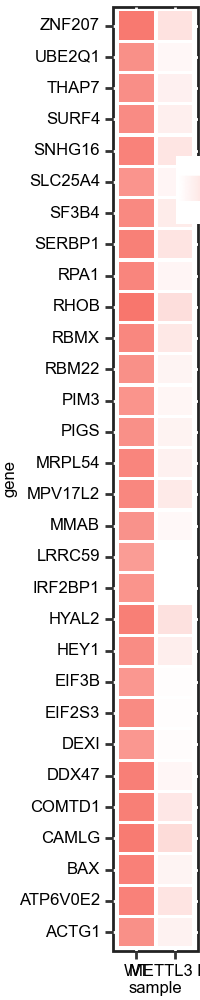

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 1 x 5 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/supplemental_figure_6c_heapmap_of_differentially_m6A-modified_genes.pdf


In [17]:
import re
import traceback
import pandas as pd
import numpy as np


from scipy import stats
from plotnine import *


WT=open("/home/wuyou/Projects/human_HEK293T_nanopore/data/predict/median_mad/WT.predict.txt")
KO=open("/home/wuyou/Projects/human_HEK293T_nanopore/data/predict/median_mad/KO.predict.txt")



WT_dict={}
for line in WT:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    seq=line.split("\t")[2]
    
    probability=float(line.split("\t")[5])
    
    if id not in WT_dict:
        WT_dict[id]=[0,0]
    WT_dict[id][1]+=1
    if probability>0.95:
        WT_dict[id][0]+=1
    

KO_dict={}
for line in KO:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    
    if id not in WT_dict:
        continue
    
    probability=float(line.split("\t")[5])
    
    if id not in KO_dict:
        KO_dict[id]=[0,0]
    KO_dict[id][1]+=1
    if probability>0.95:
        KO_dict[id][0]+=1




up_list=[]
down_list=[]
no_sig_list=[]
all_list=[]
exp_list=[]

for i,id in enumerate(KO_dict):

    if WT_dict[id][0]/WT_dict[id][1]>0.2 or KO_dict[id][0]/KO_dict[id][1]>0.2:
        oddsration,pvalue=stats.fisher_exact([WT_dict[id],KO_dict[id]])
        gene=id.split("|")[0].split(".")[0]
        if pvalue<0.05:
            exp_list.append([id,WT_dict[id][0]/WT_dict[id][1],KO_dict[id][0]/KO_dict[id][1]])
            #gene=id.split("|")[0].split(".")[0]
            if gene not in all_list:
                all_list.append(gene)
            if WT_dict[id][0]/WT_dict[id][1]<KO_dict[id][0]/KO_dict[id][1]: #up
                if gene not in up_list:
                    up_list.append(gene)
            elif WT_dict[id][0]/WT_dict[id][1]>KO_dict[id][0]/KO_dict[id][1]:
                if gene not in down_list:
                    down_list.append(gene)
            else:
                no_sig_list.append(gene)
        else:
            no_sig_list.append(gene)


down_gene_mod_rate_dict={}

for id in WT_dict:
    if id not in KO_dict:
        continue
        
    if KO_dict[id][1]<20 or WT_dict[id][1]<20:
        continue
    transcript_id=id.split("|")[0].split(".")[0]

    if transcript_id not in down_list:
        continue
    if transcript_id not in down_gene_mod_rate_dict:
        down_gene_mod_rate_dict[transcript_id]=[0,0,0]
    
    KO_mod_rate= KO_dict[id][0]/KO_dict[id][1]
    WT_mod_rate= WT_dict[id][0]/WT_dict[id][1]  
    
    diff_mod_rate=WT_mod_rate-KO_mod_rate
    
    if diff_mod_rate>down_gene_mod_rate_dict[transcript_id][0]:
        down_gene_mod_rate_dict[transcript_id][0]=diff_mod_rate
        down_gene_mod_rate_dict[transcript_id][1]=WT_mod_rate
        down_gene_mod_rate_dict[transcript_id][2]=KO_mod_rate


id_dict={}
with open("/home/wuyou/Projects/human_HEK293T_nanopore/data/GRCh38_latest_rna.fna") as f:
    for line in f:
        if ">" in line:
            id=line.split(" ")[0].split(".")[0][1:]
            gene_name=line.split("(")[1].split(")")[0]
            id_dict[id]=gene_name



black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

gene=[]
sample=[]
mod_rate=[]

down_gene_mod_rate_dict=dict(sorted(down_gene_mod_rate_dict.items(), key=lambda item: item[1][0],reverse=True))

for i,transcript_id in enumerate(down_gene_mod_rate_dict):

    if i>=30:
        break
    gene.append(id_dict[transcript_id])
    sample.append("WT")
    mod_rate.append(down_gene_mod_rate_dict[transcript_id][1])
    
    gene.append(id_dict[transcript_id])
    sample.append("METTL3 KO")
    mod_rate.append(down_gene_mod_rate_dict[transcript_id][2])


data=pd.DataFrame({"gene":gene,"sample":sample,"mod rate":mod_rate})

data['sample'] = pd.Categorical(data['sample'], categories=pd.unique(data['sample']))  #reorder legend

p=(ggplot(data,aes("sample","gene",fill="mod rate"))
  +geom_tile(aes(width=.90, height=.90))
  +theme(panel_background=element_rect(fill=gray, alpha=0),
    legend_title_align='center',
    legend_box_margin=0,
    legend_position=(1.2, 0.81),
    legend_box='vertical',

    legend_key=element_rect(fill=gray, alpha=1),
    legend_title=element_text(size=6),
    legend_text=element_text(size=6,family="Arial",color="black"),

    legend_key_size=0,       
    legend_key_width=6,
    legend_key_height=6,

    legend_entry_spacing=0,    
    legend_entry_spacing_x=15,
    legend_entry_spacing_y=5,

            panel_border=element_rect(color=black, size=1),
            axis_text_x=element_text(size=6,family="Arial",color="black",angle=0),
            axis_text_y=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),

            figure_size=[1,5])

   +scale_fill_gradient(low = "white", high = "#F8766D")  
   #+ggtitle("m6A/A ratio of differentially-modified sites from up-regulated genes (NaCl vs CK)")
   +scale_y_discrete(position="right")
)
print(p)
p.save('figure/supplemental_figure_6c_heatmap_of_differentially_m6A-modified_genes.pdf') 



### Heatmap of m6A-modified genes across 5 cell lines

In [23]:
A549="/home/wuyou/Projects/human_HEK293T_nanopore/cell_lines/results/A549.predict"
Hct116="/home/wuyou/Projects/human_HEK293T_nanopore/cell_lines/results/Hct116_extend.predict"
HepG2="/home/wuyou/Projects/human_HEK293T_nanopore/cell_lines/results/HepG2.predict"
MCF7="/home/wuyou/Projects/human_HEK293T_nanopore/cell_lines/results/MCF7.predict"
K562="/home/wuyou/Projects/human_HEK293T_nanopore/cell_lines/results/K562_extend.predict"

files=[A549,Hct116,HepG2,MCF7,K562]

def process_file(file):
    mod_dict = {}
    with open(file) as f:
        for line in f:
            line = line.rstrip()
            id = "|".join(line.split("\t")[0:2])
            probability = float(line.split("\t")[5])
            if id not in mod_dict:
                mod_dict[id] = [0, 0]
            if probability > 0.95:
                mod_dict[id][0] += 1
            mod_dict[id][1] += 1
    return mod_dict

mod_dicts = []

for file in files:
    mod_dict = process_file(file)
    mod_dicts.append(mod_dict)


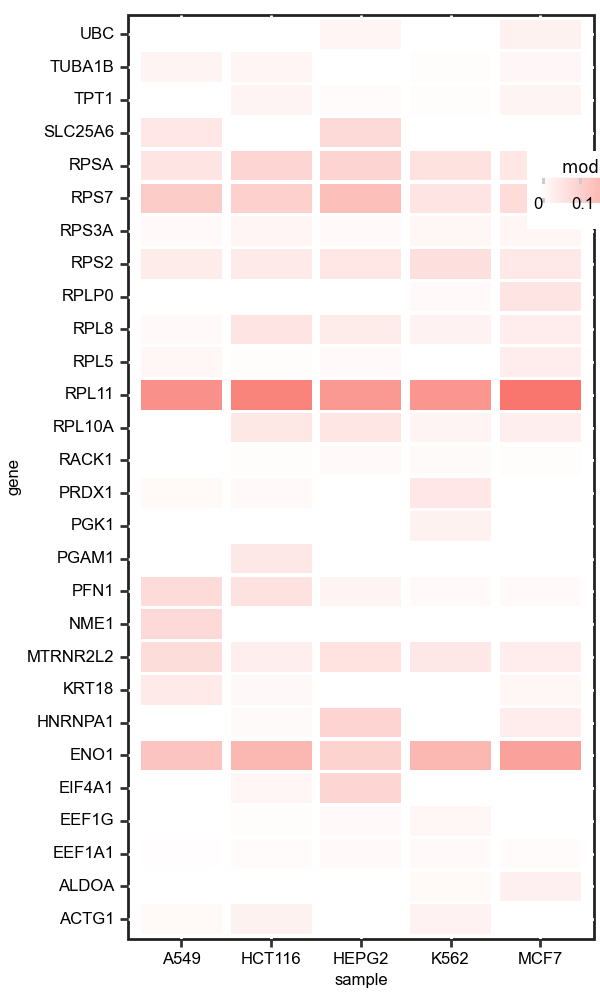

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3 x 5 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/supplemental_figure_6d_heatmap_m6A-modified_genes_across_cell_lines.pdf


In [27]:
import traceback

from plotnine import *
import pandas as pd
import re
import numpy as np


#id dict
def build_id_dict(file):
    with open(file) as f:
        for line in f:
            if ">" in line:
                id=line.split(" ")[0].split(".")[0][1:]
                gene_name=line.split("(")[1].split(")")[0]
                id_dict[id]=gene_name
    return id_dict


id_dict=build_id_dict("/home/wuyou/Projects/human_HEK293T_nanopore/data/GRCh38_latest_rna.fna")


gene=[]
sample=[]
mod_rate=[]
gene_list=[]
depth=10
count=0

for i,id in enumerate(mod_dicts[1]):
    if i %1100!=0:
        continue

    if mod_dicts[0].get(id,[0,0])[1]>depth and mod_dicts[1].get(id,[0,0])[1]>depth and mod_dicts[2].get(id,[0,0])[1]>depth and mod_dicts[3].get(id,[0,0])[1]>depth and mod_dicts[4].get(id,[0,0])[1]>depth:
        gene_id=id.split(".")[0]
        
        if gene_id not in gene_list:
            gene_list.append(gene_id)

            
            if len(gene_list)>=30:
                break
            gene.append(id_dict[gene_id])
            sample.append("A549")
            mod_rate.append(mod_dicts[0].get(id,[0,0])[0]/mod_dicts[0].get(id,[0,0])[1])
            
            gene.append(id_dict[gene_id])
            sample.append("HCT116")
            mod_rate.append(mod_dicts[1].get(id,[0,0])[0]/mod_dicts[1].get(id,[0,0])[1])
            
            gene.append(id_dict[gene_id])
            sample.append("HEPG2")
            mod_rate.append(mod_dicts[2].get(id,[0,0])[0]/mod_dicts[2].get(id,[0,0])[1])
            
            gene.append(id_dict[gene_id])
            sample.append("MCF7")
            mod_rate.append(mod_dicts[3].get(id,[0,0])[0]/mod_dicts[3].get(id,[0,0])[1])
            
            gene.append(id_dict[gene_id])
            sample.append("K562")
            mod_rate.append(mod_dicts[4].get(id,[0,0])[0]/mod_dicts[4].get(id,[0,0])[1])
            
         
#heatmap


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"


data=pd.DataFrame({"gene":gene,"sample":sample,"mod rate":mod_rate})

#data['term'] = pd.Categorical(data.term, categories=pd.unique(data.term))  #reorder legend

p=(ggplot(data,aes("sample","gene",fill="mod rate"))
  +geom_tile(aes(width=.90, height=.90))

  +theme(panel_background=element_rect(fill=gray, alpha=0),

    legend_title_align='center',
    legend_box_margin=1,
    #legend_background=element_rect(color=purple, size=2, fill='white'),
    legend_position=(1, 0.81),
    legend_box='vertical',

    legend_key=element_rect(fill=gray, alpha=1),
    legend_title=element_text(size=6),
    legend_text=element_text(size=6,family="Arial",color="black"),

    legend_key_size=0.6,            # overridden
    legend_key_width=6,
    legend_key_height=6,

    legend_entry_spacing=2,      # overridden
    legend_entry_spacing_x=15,
    legend_entry_spacing_y=5,
    panel_border=element_rect(color=black, size=1),
    axis_text_x=element_text(size=6,family="Arial",color="black",angle=0),
    axis_text_y=element_text(size=6,family="Arial",color="black"),
    axis_title_x=element_text(size=6,family="Arial",color="black"),
    axis_title_y=element_text(size=6,family="Arial",color="black"),
    plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
    figure_size=[3,5])
   +scale_fill_gradient(low = "white", high = "#F8766D")  

)
print(p)
p.save('figure/supplemental_figure_6d_heatmap_m6A-modified_genes_across_cell_lines.pdf')  


